In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch

`torch.from_numpy` 可以将 `np.array()` 格式转化为 tensor 张量格式

In [16]:
data = np.loadtxt('diabetes.csv.gz', delimiter=',', dtype=np.float32) # 读取文件，逗号隔开，神经网络一般的浮点数格式为float32
x_data = torch.from_numpy(data[:, :-1]) # 取所有行，取除了最后一列的所有列
y_data = torch.from_numpy(data[:, [-1]]) # 取所有行，取最后一列
x_data.shape, y_data.shape

(torch.Size([759, 8]), torch.Size([759, 1]))

输入特征是[759, 8]，我们要转换为[759, 1]

通过矩阵乘法进行降维将8d降维1d，同时由于是分类问题，要通过激活函数进行非线性变化

In [17]:
class Model(torch.nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.linear1 = torch.nn.Linear(8, 6) # 输入8d，输出6d
    self.linear2 = torch.nn.Linear(6, 4) # 输入6d，输出4d
    self.linear3 = torch.nn.Linear(4, 1) # 输入4d，输出1d
    self.sigmoid = torch.nn.Sigmoid() # 激活函数sigmoid
  def forward(self, x):
    x = self.sigmoid(self.linear1(x))
    x = self.sigmoid(self.linear2(x))
    x = self.sigmoid(self.linear3(x)) # y_pred
    return x

model = Model()

In [18]:
criterion = torch.nn.BCELoss(size_average=True)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

epoch_list = []
loss_list = []

In [19]:
for epoch in range(100):
  y_pred = model(x_data)
  loss = criterion(y_pred, y_data)
  
  epoch_list.append(epoch)
  loss_list.append(loss.item())

  optimizer.zero_grad()

  loss.backward()
  
  optimizer.step()

  if epoch % 10 == 0:
    print("epoch=", epoch, "loss=", loss.item())

epoch= 0 loss= 0.7788090705871582
epoch= 10 loss= 0.7636145949363708
epoch= 20 loss= 0.7501152157783508
epoch= 30 loss= 0.7381343841552734
epoch= 40 loss= 0.727510929107666
epoch= 50 loss= 0.718097448348999
epoch= 60 loss= 0.7097607851028442
epoch= 70 loss= 0.7023810744285583
epoch= 80 loss= 0.6958505511283875
epoch= 90 loss= 0.6900724768638611


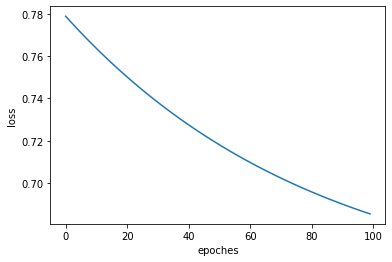

In [20]:
plt.plot(epoch_list, loss_list)
plt.xlabel('epoches')
plt.ylabel('loss')
plt.show()